In [60]:
import numpy as np
import idx2numpy
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import decomposition
imagefile = 'train-images.idx3-ubyte'
imagearray = idx2numpy.convert_from_file(imagefile_train)
data = imagearray.reshape(60000, -1)
data.shape

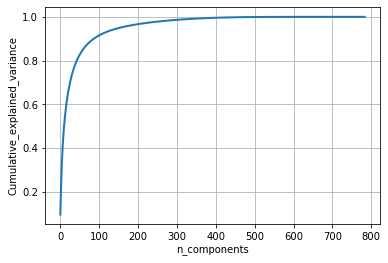

In [75]:
pca = decomposition.PCA()
pca.n_components = 784
pca_data = pca.fit_transform(data)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.savefig('Cumulative_explained_variance.png', dpi=600)

In [64]:
precision_list = [1., 5., 20., 50., 80., 95., 99.]
d_list = [np.argmax(np.clip(cum_var_explained-p/100, a_min=0, a_max=1)!=0)+1 for p in precision_list]

In [66]:
seed = 0
rng = np.random.default_rng(seed=seed)
idx_list = rng.integers(0, 784, size=(2,))

In [ ]:
pca_center = decomposition.PCA()
pca_center.mean_ = np.mean(data, axis=0)
for idx in idx_list:
    plt.figure(figsize=(7,7))
    grid_data = data[idx].reshape(28, 28)
    plt.imshow(grid_data, interpolation = "none", cmap = "gray")
    plt.savefig(f'origin_{idx}.png', dpi=600)
    for d in d_list:
        pca_center.n_components = d
        pca_data_center = pca_center.fit_transform(data)
        pca_imag_center = pca_center.inverse_transform(pca_data_center)
        plt.figure(figsize=(7,7))
        pca_grid_data = pca_imag_center[idx].reshape(28, 28)
        plt.imshow(pca_grid_data, interpolation = "none", cmap = "gray")
        plt.savefig(f'pca_{idx}_d_{d}.png', dpi=300)

In [ ]:
# warn: delete the 489 line "self.mean_ = np.mean(X, axis=0)" in scikit_learn.decomposition._pca.py
pca_noncenter = decomposition.PCA()
pca_noncenter.mean_ = np.zeros_like(np.mean(data, axis=0))
for idx in idx_list:
    plt.figure(figsize=(7,7))
    grid_data = data[idx].reshape(28, 28)
    plt.imshow(grid_data, interpolation = "none", cmap = "gray")
    plt.savefig(f'NonCenter_origin_{idx}.png', dpi=600)
    for d in d_list:
        pca_noncenter.n_components = d
        pca_data_noncenter = pca_noncenter.fit_transform(data)
        pca_imag_noncenter = pca_noncenter.inverse_transform(pca_data_noncenter)
        plt.figure(figsize=(7,7))
        pca_grid_data = pca_imag_noncenter[idx].reshape(28, 28)
        plt.imshow(pca_grid_data, interpolation = "none", cmap = "gray")
        plt.savefig(f'NonCenter_pca_{idx}_d_{d}.png', dpi=300)

In [80]:
from scipy.linalg import eigh 
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 784
pca_data = pca.fit_transform(data)
covar_matrix = pca.get_covariance()
values, vectors = eigh(covar_matrix, eigvals=(684,783))
print("Shape of eigen vectors = ",vectors.shape)
vectors = vectors.T
print("Updated shape of eigen vectors = ",vectors.shape)

Shape of eigen vectors =  (784, 100)
Updated shape of eigen vectors =  (100, 784)


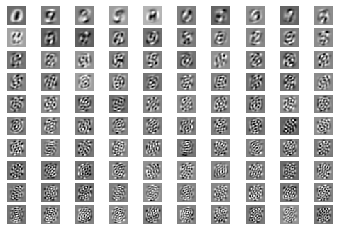

In [108]:
columns = 10
rows = 10
fig, ax_array = plt.subplots(rows, columns,squeeze=False)
for i,ax_row in enumerate(ax_array):
    for j,axes in enumerate(ax_row):
        grid_data = vectors[99-(i*columns+j)].reshape(28, 28)
        axes.set_yticklabels([])
        axes.set_xticklabels([])
        axes.set_axis_off()
        axes.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.savefig('eigh_vectors_visual.png', dpi=1000)